In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from citipy import citipy

#api key
from config import apikey



In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [3]:
#create empty list of cites
cities = []

#generate random set of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
cord = zip(lats, lngs) #zip list of latitudes and longitudes together


In [4]:
for x, d in cord:
    city = citipy.nearest_city(x, d).city_name
    if city not in cities:
        cities.append(city)


In [5]:
len(cities)

638

In [6]:
#create empty lists for data that will be pulled
long = []
lat = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
name = []
date = []

In [7]:
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for x in cities:
    try:
        url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&units=Imperial&APPID={1}').format(
        x, apikey)
        data = requests.get(url).json()
        data = requests.get(url).json()
        long1 = data['coord']['lon'] #pull the longitudes
        lat1 = data['coord']['lat'] #latitudes
        max_temp1 = data['main']['temp_max'] #pull high tempeture
        humidity1 = data['main']['humidity'] #pull humidity
        clouds1 = data['clouds']['all'] #pull cloudiness 
        wind1 = data['wind']['speed'] #pull windspeed
        country1 = data['sys']['country'] #pull country code
        name1 = data['name'] #pull city name
        date1 = time.strftime("%B %d, %Y",)
        long.append(long1) #append above data to the list created above
        lat.append(lat1)
        max_temp.append(max_temp1)
        humidity.append(humidity1)
        clouds.append(clouds1)
        wind.append(wind1)
        country.append(country1)
        name.append(name1)
        date.append(date1)
        print(f'Processing Record {len(name)} | {x}')
        time.sleep(0.95) #wait 0.95 seconds to move on; this keeps api requests within my rate limit
    except KeyError:
        print(f'{x} not found. Skipping...')
        time.sleep(0.95)


Beginning Data Retrieval
-----------------------------
Processing Record 1 | tuatapere
Processing Record 2 | vaini
bur gabo not found. Skipping...
Processing Record 3 | lebu
Processing Record 4 | baracoa
Processing Record 5 | mahebourg
Processing Record 6 | qaanaaq
Processing Record 7 | albany
Processing Record 8 | cervo
Processing Record 9 | puerto ayora
Processing Record 10 | busselton
Processing Record 11 | rikitea
Processing Record 12 | souillac
Processing Record 13 | jamestown
Processing Record 14 | tricase
Processing Record 15 | tuktoyaktuk
Processing Record 16 | samut songkhram
Processing Record 17 | chokurdakh
asau not found. Skipping...
Processing Record 18 | sitka
taolanaro not found. Skipping...
Processing Record 19 | thompson
Processing Record 20 | barrow
Processing Record 21 | east london
Processing Record 22 | borogontsy
bengkulu not found. Skipping...
Processing Record 23 | saint-philippe
Processing Record 24 | tautira
Processing Record 25 | bambous virieux
Processing Re

vicuna not found. Skipping...
Processing Record 221 | broken hill
Processing Record 222 | ilulissat
Processing Record 223 | lesnoy
himora not found. Skipping...
Processing Record 224 | kayerkan
Processing Record 225 | molango
Processing Record 226 | yumen
Processing Record 227 | sur
Processing Record 228 | bilibino
Processing Record 229 | mao
Processing Record 230 | port elizabeth
Processing Record 231 | geraldton
Processing Record 232 | benemerito de las americas
Processing Record 233 | amberley
acarau not found. Skipping...
Processing Record 234 | codrington
ozgon not found. Skipping...
Processing Record 235 | santa rosalia
Processing Record 236 | nkayi
Processing Record 237 | imbituba
Processing Record 238 | byron bay
Processing Record 239 | nelson bay
Processing Record 240 | mount isa
Processing Record 241 | grand gaube
Processing Record 242 | novyy urengoy
olafsvik not found. Skipping...
Processing Record 243 | yekaterinovka
Processing Record 244 | bandraboua
Processing Record 245

Processing Record 440 | hun
Processing Record 441 | san patricio
Processing Record 442 | jiangkou
Processing Record 443 | mattru
Processing Record 444 | mlonggo
Processing Record 445 | taveta
Processing Record 446 | chase
Processing Record 447 | monte patria
Processing Record 448 | isangel
Processing Record 449 | kisangani
Processing Record 450 | olinda
Processing Record 451 | casablanca
Processing Record 452 | xining
Processing Record 453 | halifax
Processing Record 454 | hervey bay
Processing Record 455 | agadez
Processing Record 456 | dingli
benin not found. Skipping...
Processing Record 457 | wahiawa
Processing Record 458 | gravdal
Processing Record 459 | surgut
Processing Record 460 | sortavala
Processing Record 461 | nantucket
Processing Record 462 | hitachi
Processing Record 463 | namibe
rawannawi not found. Skipping...
Processing Record 464 | batagay-alyta
Processing Record 465 | orlik
Processing Record 466 | coahuayana
Processing Record 467 | suntar
Processing Record 468 | lam

In [8]:
#convert lists into a dictionary
data = {'City Name': name, 'Country': country, 'Longitude': long, 'Latitude': lat, 'Maximum Tempeture': max_temp, 'Humidity': humidity,
        'Cloudiness(%)': clouds, 'Wind Speed': wind, 'Date': date}


In [9]:
#convert results from api calls into a df
df = pd.DataFrame(data)

#set path for output file
path = 'output/CityData.csv'

df.count() # make sure data is complete



City Name            570
Country              570
Longitude            570
Latitude             570
Maximum Tempeture    570
Humidity             570
Cloudiness(%)        570
Wind Speed           570
Date                 570
dtype: int64

In [10]:
#output df into a csv file
df.to_csv(path)
df.head()

,City Name,Country,Longitude,Latitude,Maximum Tempeture,Humidity,Cloudiness(%),Wind Speed,Date
0,Tuatapere,NZ,167.69,-46.13,61.20,67,74,7.65,"October 26, 2019"
1,Vaini,IN,74.49,15.34,78.80,83,75,13.87,"October 26, 2019"
2,Lebu,ET,38.73,8.96,60.80,44,0,2.24,"October 26, 2019"
3,Baracoa,CU,-74.50,20.35,82.33,79,73,7.99,"October 26, 2019"
4,Mahebourg,MU,57.70,-20.41,80.60,69,40,8.05,"October 26, 2019"


# Latitude vs. Temperature Plot

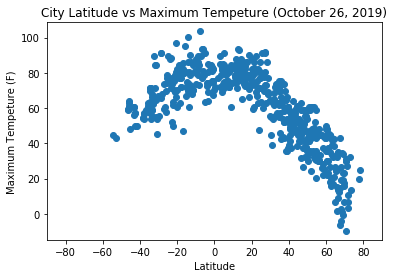

In [11]:
ddate = time.strftime("%B %d, %Y",) #set variable to current date

#create scatter plot comparing city latitude to high tempeture for current date
plt.scatter(df['Latitude'], df['Maximum Tempeture'])
plt.title(f'City Latitude vs Maximum Tempeture ({ddate})') #set title
plt.ylabel('Maximum Tempeture (F)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Maximum Tempeture']) - 5), max(df['Maximum Tempeture']) + 5)
plt.show()

# Latitude vs. Humidity Plot


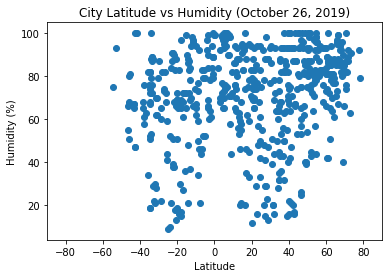

In [12]:
#create scatter plot comparing city latitude to humidity for current date
plt.scatter(df['Latitude'], df['Humidity'])
plt.title(f'City Latitude vs Humidity ({ddate})') #set title
plt.ylabel('Humidity (%)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Humidity']) - 5), max(df['Humidity']) + 5)
plt.show()

# Latitude vs. Cloudiness Plot


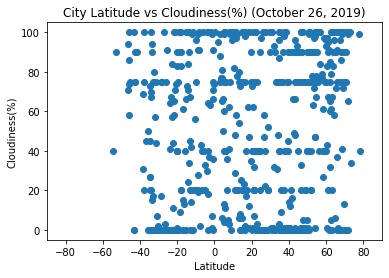

In [13]:
#create scatter plot comparing city latitude to the cloudiness of each city for current date
plt.scatter(df['Latitude'], df['Cloudiness(%)'])
plt.title(f'City Latitude vs Cloudiness(%) ({ddate})') #set title
plt.ylabel('Cloudiness(%)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Cloudiness(%)']) - 5), max(df['Cloudiness(%)']) + 5)
plt.show()

# Latitude vs. Wind Speed Plot

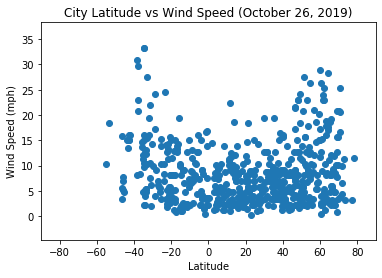

In [14]:
#create scatter plot comparing city latitude to the wind speed for current date
plt.scatter(df['Latitude'], df['Wind Speed'])
plt.title(f'City Latitude vs Wind Speed ({ddate})') #set title
plt.ylabel('Wind Speed (mph)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Wind Speed']) - 5), max(df['Wind Speed']) + 5)
plt.show()